# BOX OFFICE DATA ANALYSIS

DATASETS FROM TMDB IS USED.
THE FOLLOWING TASKS ARE PERFORMED:
# PART1
->Data Loading and Exploration
->Visualizing the Target Distribution
->Comparing Film Revenue to Budget
->Do Official Homepages Impact Revenue?
->Distribution of Languages across Films
->Common Words in Film Titles and Descriptions
->How do Film Descriptions Impact Revenue?

# PART2
->Analyzing Movie Release Dates
->Preprocessing Features
->Create Features Based on Release Date
->Using Plotly to Visualize the Number of Films Per Year
->Number of Films and Revenue Per Year
->Do Release Days Impact Revenue?
->Relationship between Runtime and Revenue

In [18]:
import numpy as np
import pandas as pd
pd.set_option('max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import json
import ast
from urllib.request import urlopen
from PIL import Image


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NIMAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Keywords,revenue,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films,num_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,num_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Morgan Freeman,cast_name_J.K. Simmons,cast_name_Bruce Willis,cast_name_Liam Neeson,cast_name_Susan Sarandon,cast_name_Bruce McGill,cast_name_John Turturro,cast_name_Forest Whitaker,cast_name_Willem Dafoe,cast_name_Bill Murray,cast_name_Owen Wilson,cast_name_Nicolas Cage,cast_name_Sylvester Stallone,genders_0_cast,genders_1_cast,genders_2_cast,cast_character_,cast_character_Himself,cast_character_Herself,cast_character_Dancer,cast_character_Additional Voices (voice),cast_character_Doctor,cast_character_Reporter,cast_character_Waitress,cast_character_Nurse,cast_character_Bartender,cast_character_Jack,cast_character_Debutante,cast_character_Security Guard,cast_character_Paul,cast_character_Frank,num_crew,crew_name_Avy Kaufman,crew_name_Robert Rodriguez,crew_name_Deborah Aquila,crew_name_James Newton Howard,crew_name_Mary Vernieu,crew_name_Steven Spielberg,crew_name_Luc Besson,crew_name_Jerry Goldsmith,crew_name_Francine Maisler,crew_name_Tricia Wood,crew_name_James Horner,crew_name_Kerry Barden,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,genders_0_crew,genders_1_crew,genders_2_crew,jobs_

Text(0.5, 1.0, 'Log distribution of revenue')

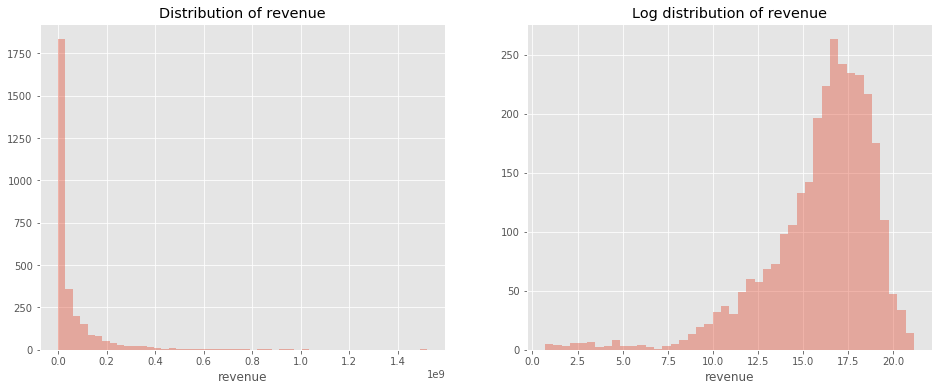

In [9]:
fig,ax=plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(train['revenue'],kde=False);
plt.title('Distribution of revenue');
plt.subplot(1,2,2)
sns.distplot(np.log1p(train['revenue']),kde=False)
plt.title('Log distribution of revenue')

In [10]:
train['log_rev']=np.log1p(train['revenue'])

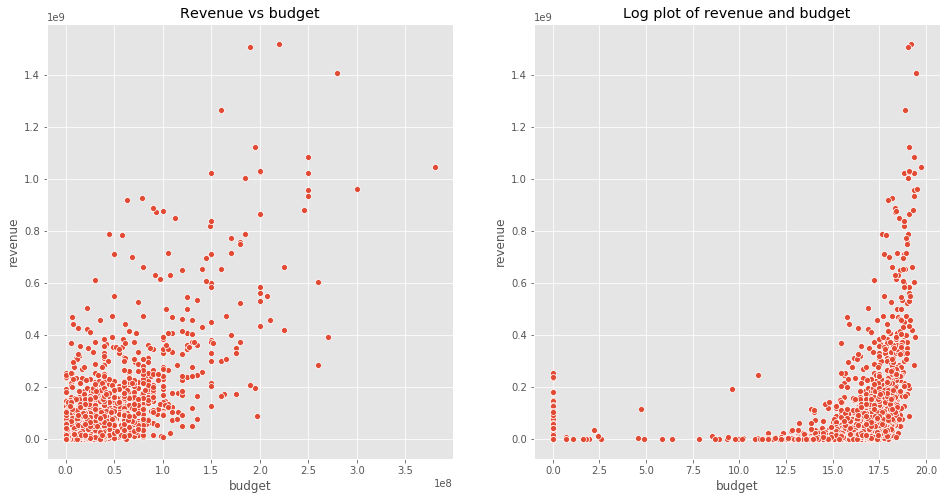

In [11]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.scatterplot(train['budget'],train['revenue']);
plt.title('Revenue vs budget');
plt.subplot(1,2,2)
sns.scatterplot(np.log1p(train['budget']),train['revenue']);
plt.title('Log plot of revenue and budget');

In [12]:
train['budget']=np.log1p(train['budget'])
test['budget']=np.log1p(test['budget'])

In [13]:
train['homepage'].value_counts().head()

http://www.transformersmovie.com/              4
http://www.lordoftherings.net/                 2
http://www.thehobbit.com/                      2
http://www.areyousuperbad.com/                 1
http://www.vantagepoint-movie.com/index.php    1
Name: homepage, dtype: int64

In [14]:
train['has_homepage']=0
test['has_homepage']=0
train.loc[train['homepage'].isnull()==False,'has_homepage']=1
test.loc[test['homepage'].isnull()==False,'has_homepage']=1

Text(0.5, 1, 'Revenue for films based on homepage')

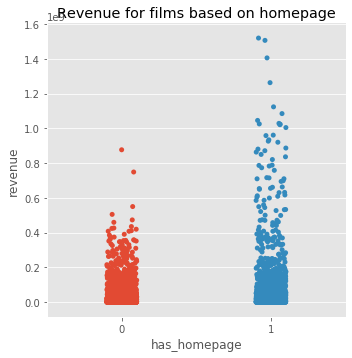

In [15]:
sns.catplot(x='has_homepage',y='revenue',data=train);
plt.title('Revenue for films based on homepage')

In [16]:
lang_data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]

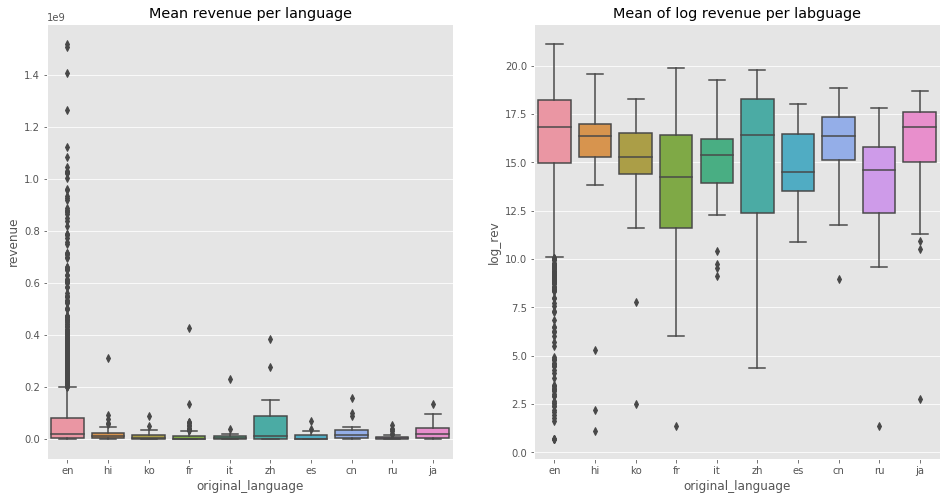

In [17]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(x='original_language',y='revenue',data=lang_data);
plt.title('Mean revenue per language');
plt.subplot(1,2,2)
sns.boxplot(x='original_language',y='log_rev',data=lang_data);
plt.title('Mean of log revenue per labguage');

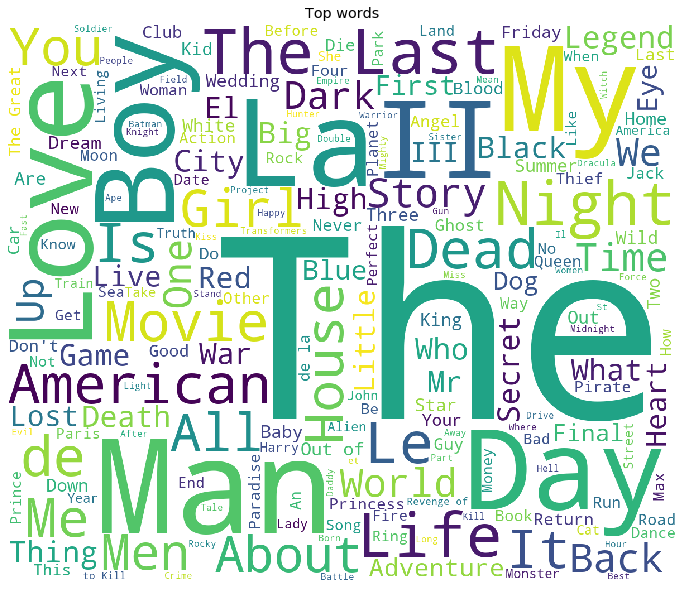

In [19]:
plt.figure(figsize=(12,12))
text=' '.join(train['original_title'].values)
wordcloud=WordCloud(max_font_size=None,background_color='white',width=1200,
                   height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words')
plt.axis('off')
plt.show()

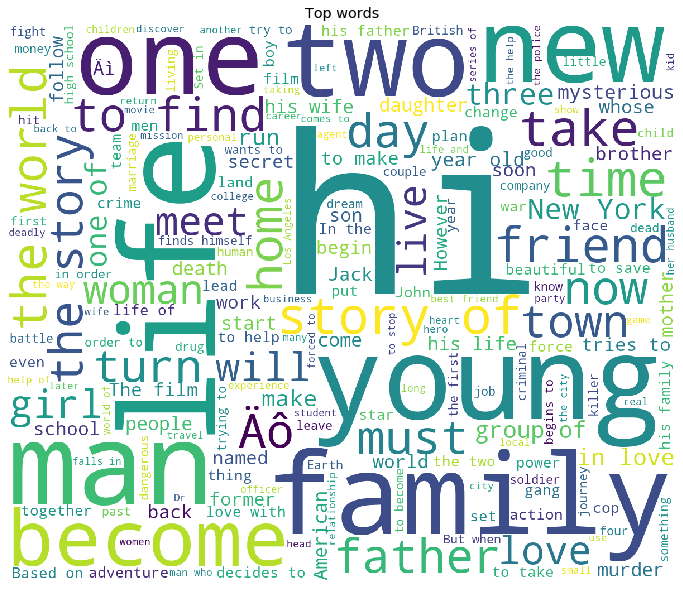

In [20]:
plt.figure(figsize=(12,12))
text=' '.join(train['overview'].fillna('').values)
wordcloud=WordCloud(max_font_size=None,background_color='white',width=1200,
                   height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words')
plt.axis('off')
plt.show()

In [22]:
import eli5
from sklearn.linear_model import LinearRegression

C:\Users\NIMAL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning:

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.

C:\Users\NIMAL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning:

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.



In [24]:
vectorizer=TfidfVectorizer(sublinear_tf=True,
                          analyzer='word',
                          token_pattern=r'\w{1,}',
                          ngram_range=(1,2),
                          min_df=5)
overview_text=vectorizer.fit_transform(train['overview'].fillna(''))
lin_reg=LinearRegression()
lin_reg.fit(overview_text,train['log_rev'])
eli5.show_weights(lin_reg,vec=vectorizer,top=20,feature_filter=lambda x:x!='<BIAS>')

In [25]:
test.loc[test['release_date'].isnull()==False,'release_date'].head()

0    7/14/07
1    5/19/58
2    5/23/97
3     9/4/10
4    2/11/05
Name: release_date, dtype: object

In [26]:
def fix_date(x):
    year=x.split('/')[2]
    if(int(year)<=19):
        return x[:-2]+'20'+year
    else:
        return x[:-2]+'19'+year


In [27]:
test.loc[test['release_date'].isnull()==True].head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Keywords,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films,num_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,num_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Morgan Freeman,cast_name_J.K. Simmons,cast_name_Bruce Willis,cast_name_Liam Neeson,cast_name_Susan Sarandon,cast_name_Bruce McGill,cast_name_John Turturro,cast_name_Forest Whitaker,cast_name_Willem Dafoe,cast_name_Bill Murray,cast_name_Owen Wilson,cast_name_Nicolas Cage,cast_name_Sylvester Stallone,genders_0_cast,genders_1_cast,genders_2_cast,cast_character_,cast_character_Himself,cast_character_Herself,cast_character_Dancer,cast_character_Additional Voices (voice),cast_character_Doctor,cast_character_Reporter,cast_character_Waitress,cast_character_Nurse,cast_character_Bartender,cast_character_Jack,cast_character_Debutante,cast_character_Security Guard,cast_character_Paul,cast_character_Frank,num_crew,crew_name_Avy Kaufman,crew_name_Robert Rodriguez,crew_name_Deborah Aquila,crew_name_James Newton Howard,crew_name_Mary Vernieu,crew_name_Steven Spielberg,crew_name_Luc Besson,crew_name_Jerry Goldsmith,crew_name_Francine Maisler,crew_name_Tricia Wood,crew_name_James Horner,crew_name_Kerry Barden,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,genders_0_crew,genders_1_crew,genders_2_crew,jobs_Producer

In [28]:
test.loc[test['release_date'].isnull()==True,'release_date']='05/01/00'

In [29]:
train['release_date']=train['release_date'].apply(lambda x: fix_date(x))
test['release_date']=test['release_date'].apply(lambda x: fix_date(x))

In [30]:
train['release_date']=pd.to_datetime(train['release_date'])
test['release_date']=pd.to_datetime(test['release_date'])

In [31]:
def process_date(df):
    date_parts=['year','weekday','month','weekofyear','day','quarter']
    for part in date_parts:
        part_col='release_date'+'_'+part
        df[part_col]=getattr(df['release_date'].dt,part).astype(int)
    return df
train=process_date(train)
test=process_date(test)

In [32]:
d1=train['release_date_year'].value_counts().sort_index()
d2=test['release_date_year'].value_counts().sort_index()

In [33]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

data=[go.Scatter(x=d1.index,y=d1.values,name='train'),
     go.Scatter(x=d2.index,y=d2.values,name='test')]
layout=go.Layout(dict(title='Number of films per year',
                     xaxis=dict(title='year'),
                     yaxis=dict(title='count'),),
                legend=dict(orientation='v'))
py.iplot(dict(data=data,layout=layout))

In [34]:
d1=train['release_date_year'].value_counts().sort_index()
d2=train.groupby(['release_date_year'])['revenue'].sum()
data=[go.Scatter(x=d1.index,y=d1.values,name='film count'),
     go.Scatter(x=d2.index,y=d2.values,name='total revenue',yaxis='y2')]
layout=go.Layout(dict(title='Number of films and total revenue per year',
                     xaxis=dict(title='year'),
                     yaxis=dict(title='count'),
                     yaxis2=dict(title='total revenue',overlaying='y',side='right')),
                legend=dict(orientation='v'))
py.iplot(dict(data=data,layout=layout))

In [35]:
d1=train['release_date_year'].value_counts().sort_index()
d2=train.groupby(['release_date_year'])['revenue'].mean()
data=[go.Scatter(x=d1.index,y=d1.values,name='film count'),
     go.Scatter(x=d2.index,y=d2.values,name='total revenue',yaxis='y2')]
layout=go.Layout(dict(title='Number of films and mean revenue per year',
                     xaxis=dict(title='year'),
                     yaxis=dict(title='count'),
                     yaxis2=dict(title='mean revenue',overlaying='y',side='right')),
                legend=dict(orientation='v'))
py.iplot(dict(data=data,layout=layout))

Text(0.5, 1, 'Revenue on each day of the week')

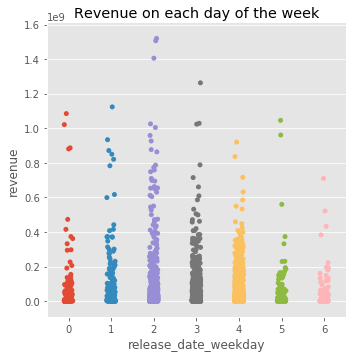

In [36]:
sns.catplot(x='release_date_weekday',y='revenue',data=train);
plt.title('Revenue on each day of the week')

Text(0.5, 1.0, 'Runtime Distribution')

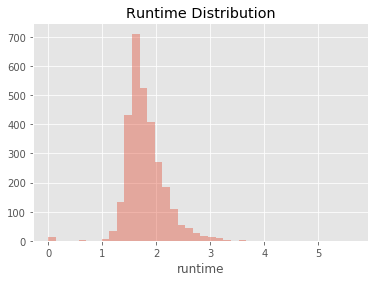

In [37]:
sns.distplot(train['runtime'].fillna(0)/60,bins=40,kde=False)
plt.title('Runtime Distribution')

Text(0.5, 1.0, 'Runtime vs revenue')

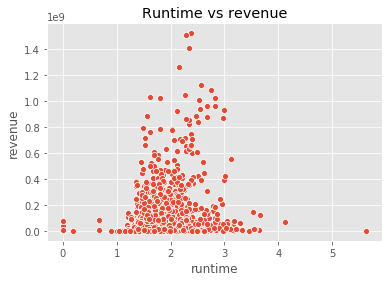

In [38]:
sns.scatterplot(train['runtime'].fillna(0)/60,train['revenue'])
plt.title('Runtime vs revenue')